In [499]:
from pathlib import Path
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [500]:
data_path = Path("./datasets/bike-sharing-demand.zip")
if data_path.is_file():
    with zipfile.ZipFile(data_path, 'r') as bike_sharing_zip_file:
        bike_sharing_zip_file.extractall(path="./datasets/bikeshare")
    data_path.unlink()

In [501]:
df = pd.read_csv("./datasets/bikeshare/train.csv", parse_dates=['datetime'])

datetime - hourly date + timestamp    
season -    

1 = spring,   
2 = summer,   
3 = fall,   
4 = winter    

holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday   
weather -   

1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    


temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [502]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [504]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


## Extracting the year, month, day and hour

In [505]:
# Extract year, month, day, and hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['day_of_the_week'] = df['datetime'].dt.day_name()

In [506]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_the_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [507]:
# no null values
df.isna().sum()

datetime           0
season             0
holiday            0
workingday         0
weather            0
temp               0
atemp              0
humidity           0
windspeed          0
casual             0
registered         0
count              0
year               0
month              0
day                0
hour               0
day_of_the_week    0
dtype: int64

## Visualise the data

### 1. Demand by Hours/Day/Month

In [508]:
def get_df(df=df, col="hour", group_col="count"):
    return pd.DataFrame(df.groupby([col])[group_col].sum()).reset_index(drop=True)

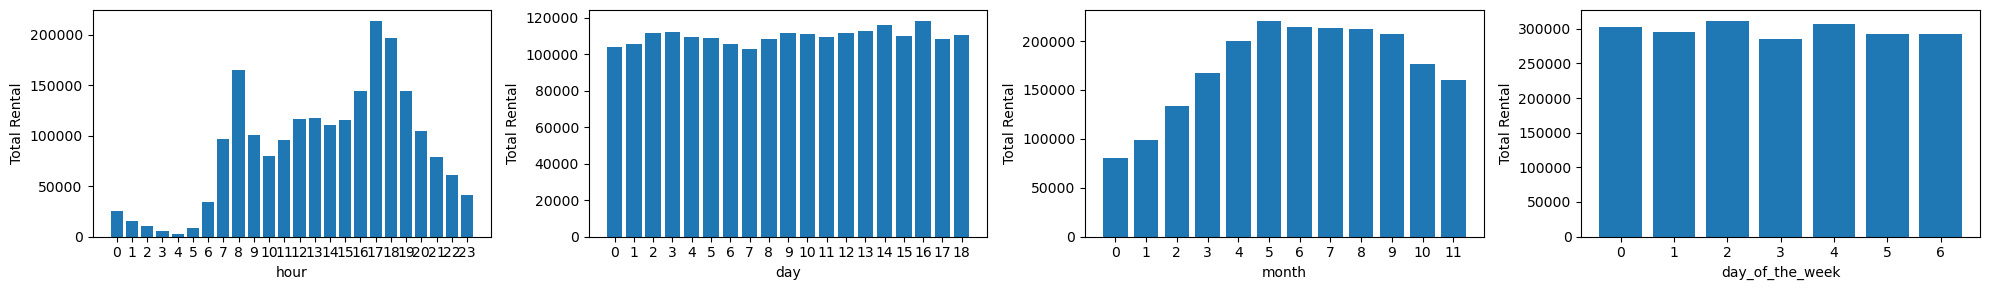

In [509]:
cols = ["hour", "day", "month", "day_of_the_week"]
fig, axes = plt.subplots(1,4, figsize=(20, 3))
for each, ax in zip(cols, axes):
    index_ = get_df(col=each).index
    ax.bar(index_, height=get_df(col=each)["count"], )
    ax.set_xticks(index_)
    ax.set_xlabel(f"{each}")
    ax.set_ylabel("Total Rental")

plt.tight_layout()

### 2. Demand by Season/weather/holiday

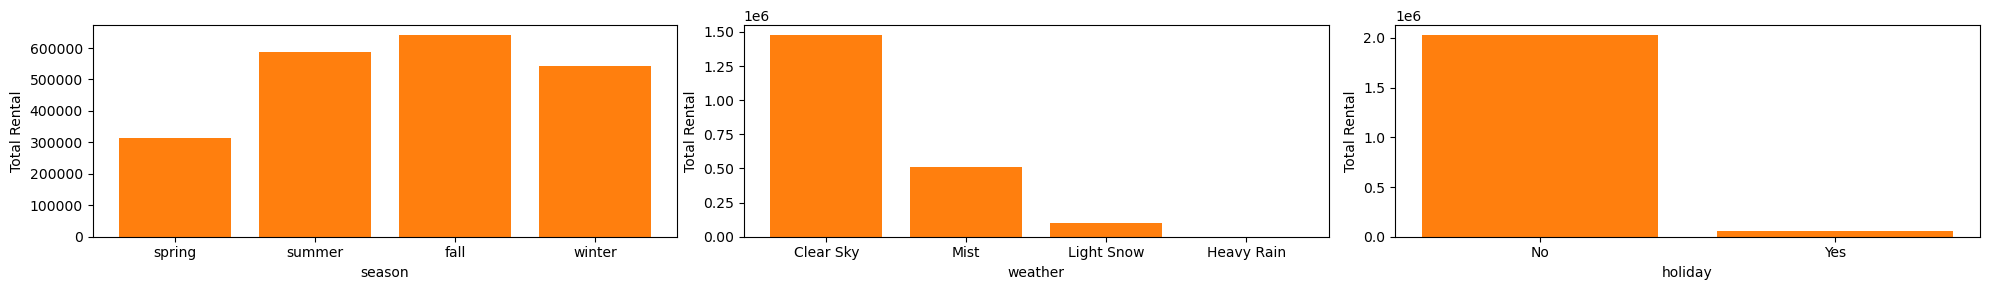

In [510]:
cols = ["season", "weather", "holiday"]
fig, axes = plt.subplots(1,3, figsize=(20, 3))
for each, ax in zip(cols, axes):
    index_ = get_df(col=each).index
    ax.bar(index_, height=get_df(col=each)["count"])
    ax.bar(index_, height=get_df(col=each)["count"])
    
    ax.set_xticks(index_)
    if each == "season":
        ax.set_xticklabels(["spring", "summer", "fall", "winter"])
    elif each == "weather":
        ax.set_xticklabels(["Clear Sky", "Mist", "Light Snow", "Heavy Rain"])
    else:
        ax.set_xticklabels(["No", "Yes",])
        

        
    ax.set_xlabel(f"{each}")
    ax.set_ylabel("Total Rental")

plt.tight_layout()

### Division by registered and non-registered user

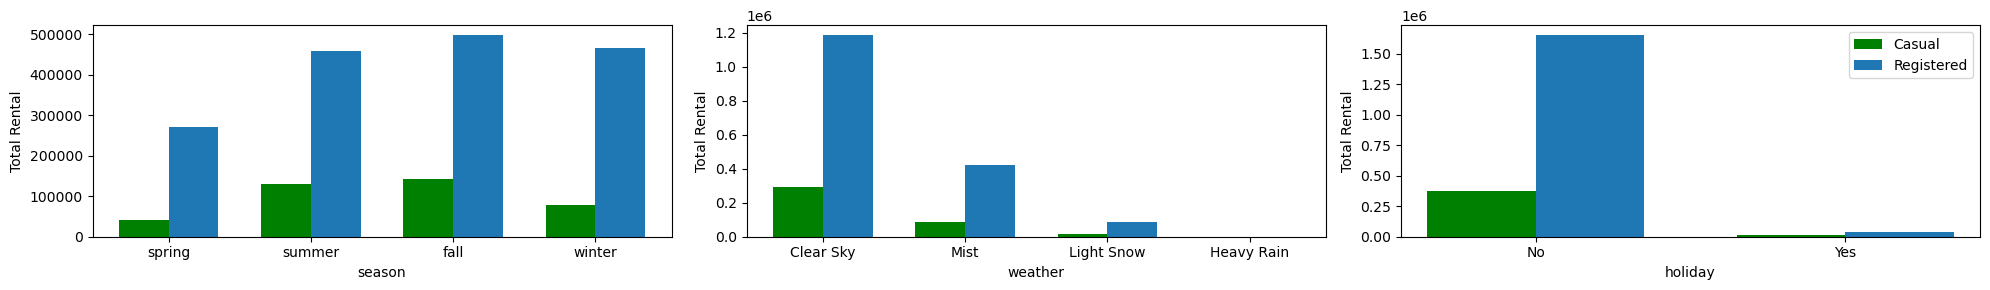

In [511]:
cols = ["season", "weather", "holiday"]
fig, axes = plt.subplots(1,3, figsize=(20, 3))
bar_width = 0.35
for each, ax in zip(cols, axes):
    index_ = get_df(col=each).index
    ax.bar(index_ - bar_width/2, height=get_df(col=each, group_col="casual")["casual"], width=bar_width,color="green", label="Casual")
    ax.bar(index_ + bar_width/2, height=get_df(col=each,group_col="registered" )["registered"], width=bar_width, label="Registered")
    
    ax.set_xticks(index_)
    if each == "season":
        ax.set_xticklabels(["spring", "summer", "fall", "winter"])
    elif each == "weather":
        ax.set_xticklabels(["Clear Sky", "Mist", "Light Snow", "Heavy Rain"])
    else:
        ax.set_xticklabels(["No", "Yes",])
        

        
    ax.set_xlabel(f"{each}")
    ax.set_ylabel("Total Rental")

plt.tight_layout()
plt.legend()

### using pandas hist to plot

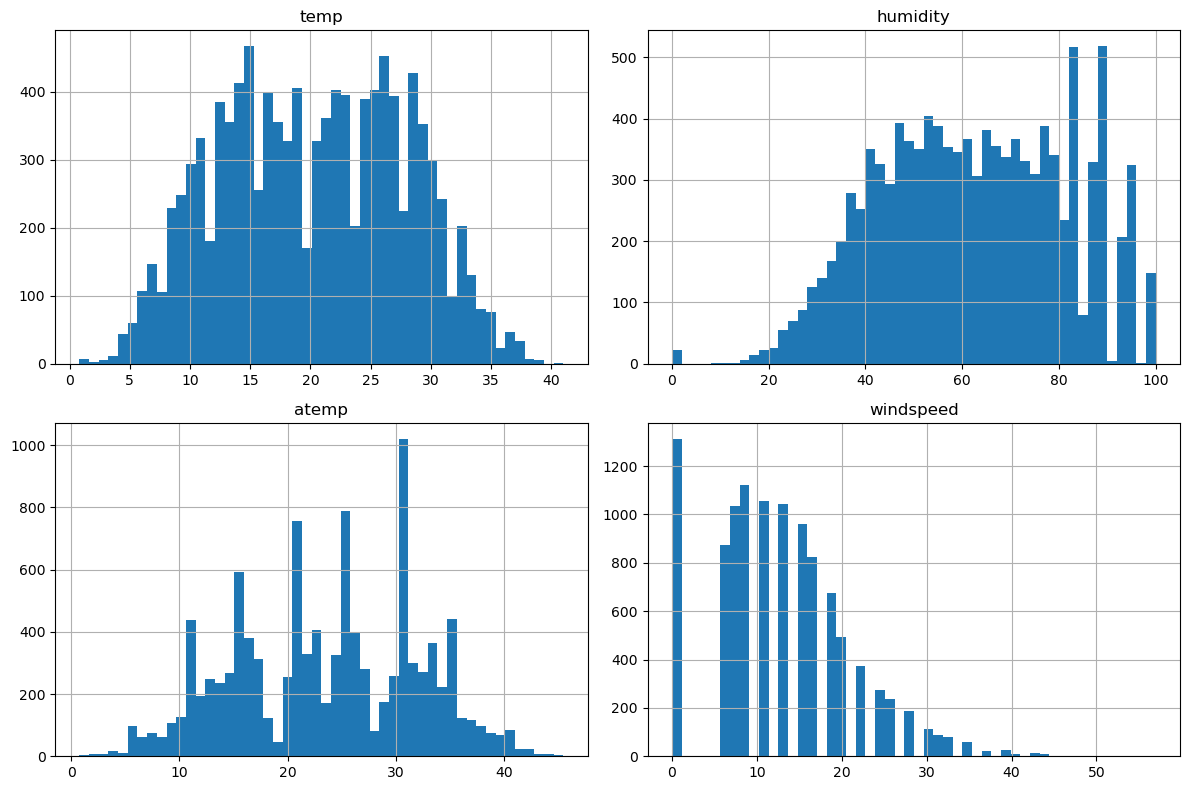

In [512]:
df[['temp', 'humidity', 'atemp', 'windspeed']].hist(bins=50, figsize=(12,8))

plt.tight_layout()

array([[<Axes: title={'center': 'count'}>]], dtype=object)

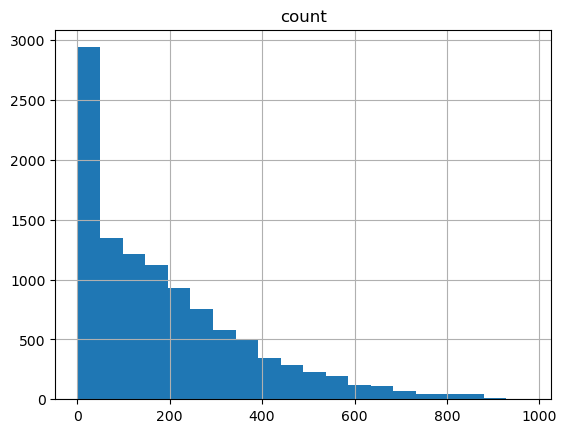

In [513]:
df[['count']].hist(bins=20)

**Our target variable is right skewed**

## let us cut the count in groups and look at the data

In [514]:
df['rental_category'] = pd.cut(df['count'], bins=[0, 100, 300, 500, 700, 900, 1000], labels=["0-100" ,"100-300", "300-500", "500-700", "700-900", "900+"] )

<Axes: xlabel='rental_category', ylabel='Count'>

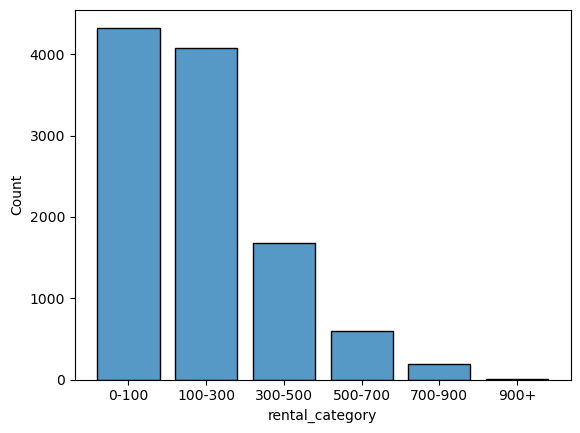

In [516]:
sns.histplot(df, x="rental_category", shrink=0.8)

In [517]:
## Adding categories to the category columns

In [518]:
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

## looking for correlation

In [519]:
features = df.columns[5:12]

In [520]:
df_corr = X_train[features].corr()['count']

<Axes: >

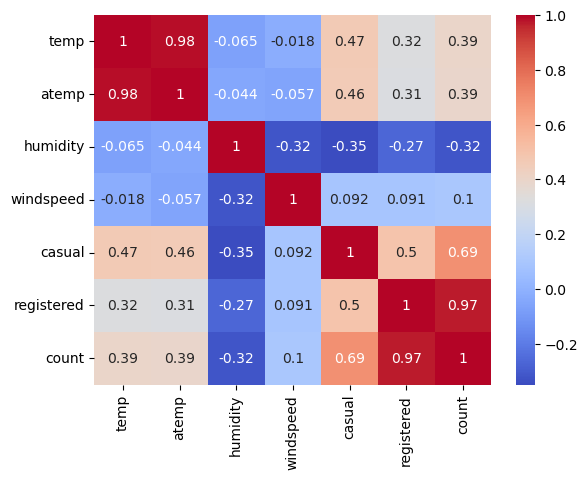

In [521]:
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")

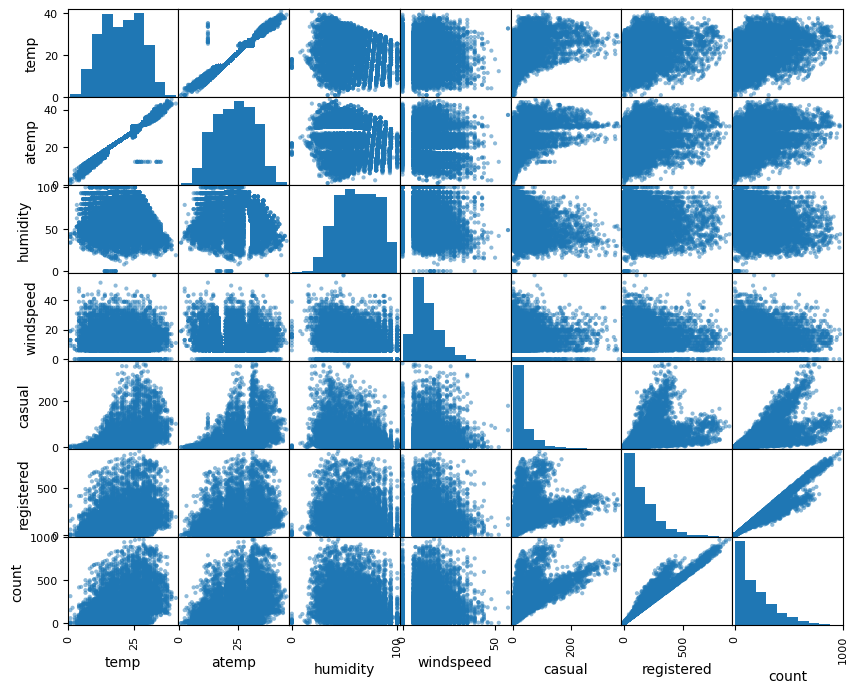

In [523]:
sc_matrix = scatter_matrix(df[features], figsize=(10,8))

The relatonship exists between feature "temp" and the target "count", but lets further analyse is the relationship linear or polynomial.

<Axes: xlabel='temp', ylabel='count'>

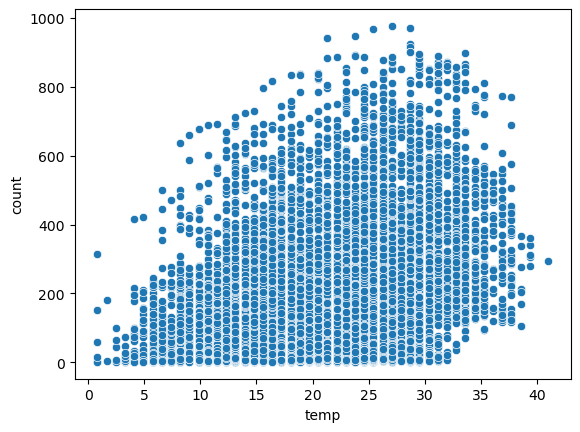

In [524]:
sns.scatterplot(df, x="temp", y="count")

## Does a line explains the data?

In [525]:
from sklearn.linear_model import LinearRegression

In [526]:
X = df[['temp']]
y = df['count']

In [527]:
X

,temp
0,9.84
1,9.02
2,9.02
3,9.84
4,9.84
...,...
10881,15.58
10882,14.76
10883,13.94
10884,13.94


In [528]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [529]:
y_pred = model.predict(X)

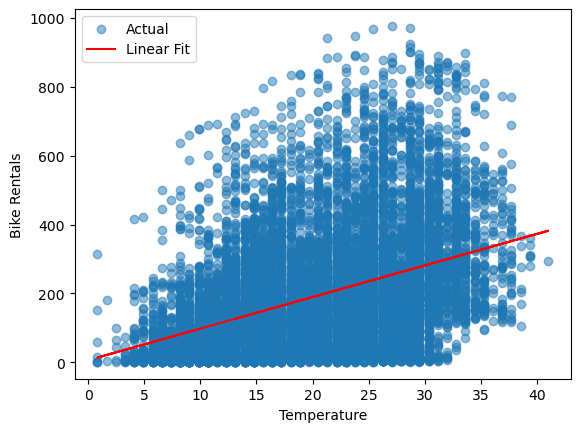

In [530]:
plt.scatter(df['temp'], df['count'], alpha=0.5, label="Actual")
plt.plot(df['temp'], y_pred, color='red', label="Linear Fit")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()

A linear regression line is not a good fit tot he data

## Let us try polynomial regression  with degree = 2,3,4,5 (Quadratic)

In [531]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [532]:
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())
poly_model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [533]:
y_poly_pred = poly_model.predict(X)

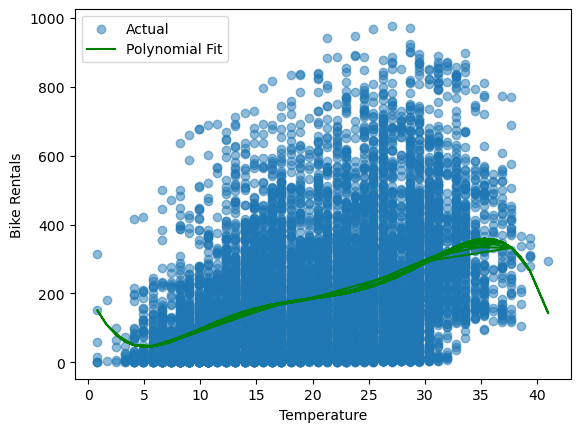

In [534]:
plt.scatter(df['temp'], df['count'], alpha=0.5, label="Actual")
plt.plot(df['temp'], y_poly_pred, color='green', label="Polynomial Fit")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()

## Outlier Analysis

In [535]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'day_of_the_week', 'rental_category'],
      dtype='object')

<Axes: xlabel='workingday', ylabel='count'>

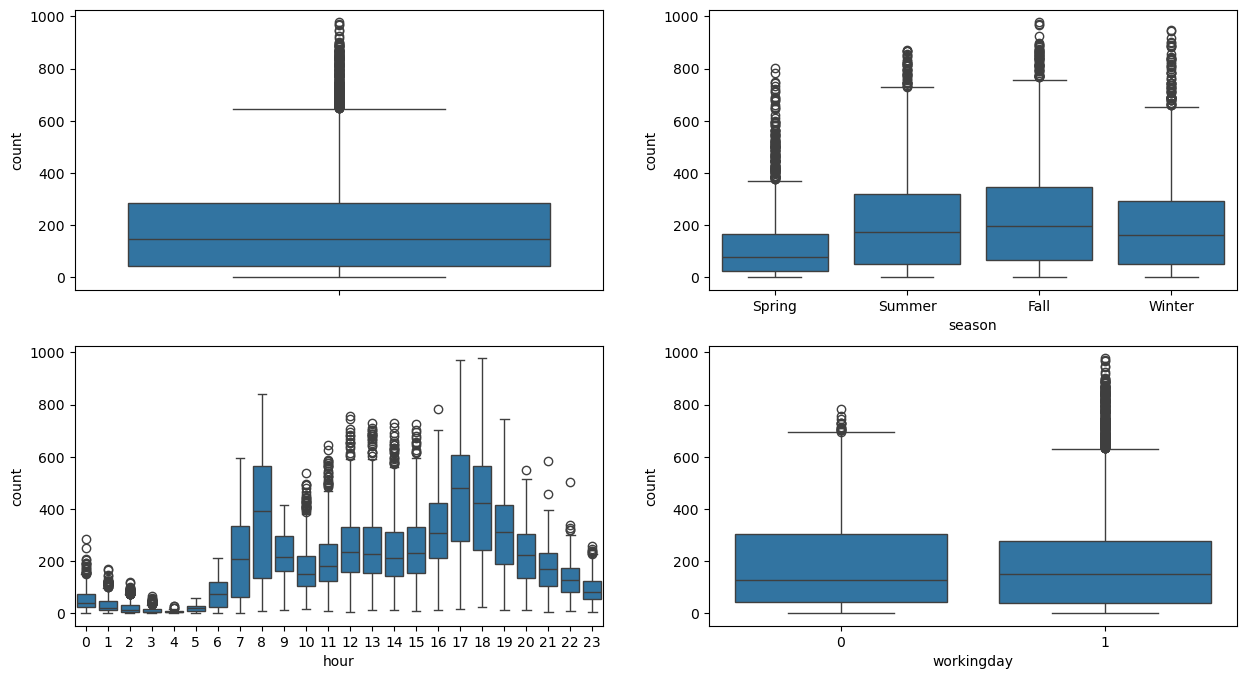

In [536]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.boxplot(data=df, y="count", ax=axes[0][0])
sns.boxplot(data=df, x="season", y="count", ax=axes[0][1])
sns.boxplot(data=df, x="hour", y="count", ax=axes[1][0])
sns.boxplot(data=df, x="workingday", y="count", ax=axes[1][1])

We can see that there are a lot of outliers, which may not be good for our learning algorithm. Since, our variable is not in normal distribution. We will use IQR method to remove the outlier.

In [537]:
Q1 = df["count"].quantile(0.25)
Q3 = df["count"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [538]:
IQR

242.0

In [539]:
upper_bound

647.0

In [541]:
df = df[(df["count"] >= lower_bound) & (df["count"] <= upper_bound)]

<Axes: ylabel='count'>

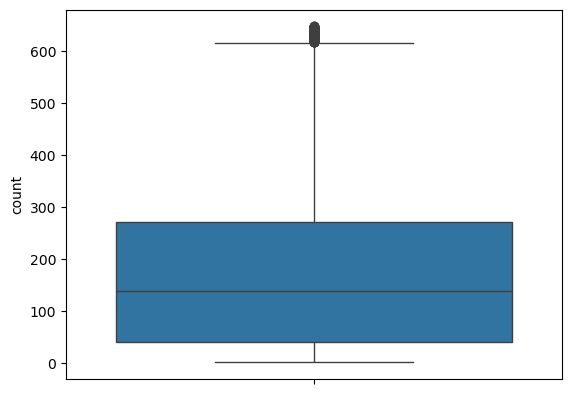

In [543]:
sns.boxplot(data=df, y="count")


As, we can see we have dropped a lot of outliers

## let us create a pipeline to imputing, scaling, onehot encoding the variables

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10586 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10586 non-null  datetime64[ns]
 1   season           10586 non-null  object        
 2   holiday          10586 non-null  int64         
 3   workingday       10586 non-null  int64         
 4   weather          10586 non-null  object        
 5   temp             10586 non-null  float64       
 6   atemp            10586 non-null  float64       
 7   humidity         10586 non-null  int64         
 8   windspeed        10586 non-null  float64       
 9   casual           10586 non-null  int64         
 10  registered       10586 non-null  int64         
 11  count            10586 non-null  int64         
 12  year             10586 non-null  int32         
 13  month            10586 non-null  int32         
 14  day              10586 non-null  int32     

In [544]:
num_pipe = Pipeline([
    ("Imputing", SimpleImputer(strategy="median")),
    ("standarize", StandardScaler())
])

In [545]:
cate_pipe = Pipeline([
    ("Imputing", SimpleImputer(strategy="most_frequent")),
    ("OneHot", OneHotEncoder(handle_unknown="ignore"))
])

In [549]:
preprocessing = ColumnTransformer([
    ("num", num_pipe, make_column_selector(dtype_include=np.number)),
    ("cate", cate_pipe, make_column_selector(dtype_include=np.object_))
])

In [554]:
processed_df = preprocessing.fit_transform(df)

In [552]:
preprocessing.feature_names_in_

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'day_of_the_week',
       'rental_category'], dtype=object)

In [553]:
preprocessing.get_feature_names_out()

array(['num__holiday', 'num__workingday', 'num__temp', 'num__atemp',
       'num__humidity', 'num__windspeed', 'num__casual',
       'num__registered', 'num__count', 'num__year', 'num__month',
       'num__day', 'num__hour', 'cate__season_Fall',
       'cate__season_Spring', 'cate__season_Summer',
       'cate__season_Winter',
       'cate__weather_ Clear + Few clouds + Partly cloudy + Partly cloudy',
       'cate__weather_ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ',
       'cate__weather_ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'cate__weather_ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ',
       'cate__day_of_the_week_Friday', 'cate__day_of_the_week_Monday',
       'cate__day_of_the_week_Saturday', 'cate__day_of_the_week_Sunday',
       'cate__day_of_the_week_Thursday', 'cate__day_of_the_week_Tuesday',
       'cate__day_of_the_week_Wednesday'], dtype=object)

In [555]:
pd.DataFrame(processed_df, columns=preprocessing.get_feature_names_out())

,num__holiday,num__workingday,num__temp,num__atemp,num__humidity,num__windspeed,num__casual,num__registered,num__count,num__year,num__month,num__day,num__hour,cate__season_Fall,cate__season_Spring,cate__season_Summer,cate__season_Winter,cate__weather_ Clear + Few clouds + Partly cloudy + Partly cloudy,"cate__weather_ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","cate__weather_ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","cate__weather_ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",cate__day_of_the_week_Friday,cate__day_of_the_week_Monday,cate__day_of_the_week_Saturday,cate__day_of_the_week_Sunday,cate__day_of_the_week_Thursday,cate__day_of_the_week_Tuesday,cate__day_of_the_week_Wednesday
0,-0.173399,-1.445961,-1.313626,-1.072492,0.979432,-1.563273,-0.659419,-1.014215,-1.021518,-0.975918,-1.585888,-1.639433,-1.646050,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.173399,-1.445961,-1.419009,-1.162247,0.927431,-1.563273,-0.552969,-0.864537,-0.868019,-0.975918,-1.585888,-1.639433,-1.502374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.173399,-1.445961,-1.419009,-1.162247,0.927431,-1.563273,-0.616839,-0.903926,-0.919186,-0.975918,-1.585888,-1.639433,-1.358697,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.173399,-1.445961,-1.313626,-1.072492,0.667426,-1.563273,-0.659419,-1.037848,-1.040706,-0.975918,-1.585888,-1.639433,-1.215021,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.173399,-1.445961,-1.313626,-1.072492,0.667426,-1.563273,-0.723289,-1.108748,-1.117455,-0.975918,-1.585888,-1.639433,-1.071344,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,-0.173399,0.691582,-0.575944,-0.446565,-0.632598,1.618247,-0.574259,1.475160,1.025137,1.024676,1.588887,1.647817,1.083803,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10582,-0.173399,0.691582,-0.681327,-0.714651,-0.268591,0.272188,-0.510389,0.703139,0.417536,1.024676,1.588887,1.647817,1.227480,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10583,-0.173399,0.691582,-0.786710,-0.893571,-0.060588,0.272188,-0.638129,0.175328,-0.049357,1.024676,1.588887,1.647817,1.371156,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10584,-0.173399,0.691582,-0.786710,-0.714651,-0.060588,-0.828761,-0.467809,-0.194927,-0.298793,1.024676,1.588887,1.647817,1.514833,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
